# EDA-4. Статистические тесты

## 1. Введение

Представим, что перед полноценным запуском рекомендательной системы в онлайн-магазине мы протестировали её на части покупателей и увидели, что средний чек заказа вырос. Означает ли это, что мы увидим такой же результат и на других заказах? Можно ли запускать рекомендательную систему для всех покупателей?

Отвечать на подобные вопросы позволяет аппарат статистических тестов.

Статистические тесты — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Вам будут встречаться разнообразные бизнес-задачи, и статистические тесты позволят избегать ошибочных решений. В примере выше благодаря статистическим тестам удастся сэкономить ресурсы компании, если окажется, что запуск рекомендательной системы на самом деле неэффективен.

Важно отметить, что статистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. Чтобы правильно их использовать, требуются определённые знания, в том числе в области математической статистики. Кроме того, результаты статистических тестов могут зависеть от выбора метода и параметров, которые использовались при их проведении. Поэтому важно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

В этом модуле мы узнаем, как проводить статистические тесты, выбирать подходящий тест и оценивать результаты исследования.

Модуль можно условно разделить на две части:

Первая посвящена теории: мы изучим основные определения и понятия, связанные со статистическими тестами.
Во второй части мы перейдём к практическим примерам и задачам и решим их на Python.

В МОДУЛЕ МЫ РАЗБЕРЁМ:

* что такое статистическая гипотеза;

* какие бывают статистические тесты;

* что такое значимость, уровень значимости, ошибки первого и второго рода.

ВЫ НАУЧИТЕСЬ:

* различать типы гипотез;

* выдвигать собственные гипотезы;

* самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки;

* проводить различные статистические тесты на языке Python.

## 2. Необходимость в статистических тестах

Несмотря на то что статистические тесты часто используют для принятия бизнес-решений, всё же бывают ситуации, когда обращаться к ним необязательно. О таких ситуациях мы поговорим отдельно в конце модуля.

В этом и последующих юнитах мы рассмотрим случаи, когда без статистических тестов не обойтись. Для начала введём понятия «генеральной совокупности» и «выборки» — они пригодятся нам в дальнейших рассуждениях.

Генеральной совокупностью называется всё множество интересующих нас объектов, а выборкой — случайное подмножество этого множества.

Часто множество объектов генеральной совокупности настолько большое, что мы не можем посчитать все объекты. Например, все заказы в онлайн-магазине — это генеральная совокупность, а часть заказов — выборка. Мы не можем посчитать все заказы как минимум потому, что часть из них ещё не совершена.

Мы уже знаем, что на основе выборки (части наблюдений) можно измерить следующие показатели:

* выборочное среднее (центральная мера распределения);
* выборочное стандартное отклонение (мера разброса);
* выборочная пропорция.

Однако на самом деле нас всегда интересуют параметры генеральной совокупности:

* истинное среднее — математическое ожидание («мю»);
* истинное стандартное отклонение («сигма»);
* истинная пропорция (p).

Например, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

Выборочная статистика — это случайная величина, так как рассчитана на случайной выборке. Например, значение среднего на двух разных выборках будет разным.

Параметр генеральной совокупности — это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Однако благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.

Как это можно сделать? Давайте разбираться.

Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. Команда Data Science должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам.

Как тогда поступить?

1. Показать рекомендации только части покупателей (выборке).
2. Замерить средний чек на полученной выборке (пусть он получится равным N рублей).
3. Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.
4. Сделать вывод, запускать ли рекомендательную систему на весь магазин.

Почему нельзя просто сделать вывод, что если средний чек в выборке равен  рублей, то он также будет равен  рублей на всех заказах? Потому что, возможно, значения, полученные на выборке, не отражают значения на генеральной совокупности. Например, на рисунке ниже средний чек заказов в выборке меньше, чем средний чек по всем заказам.

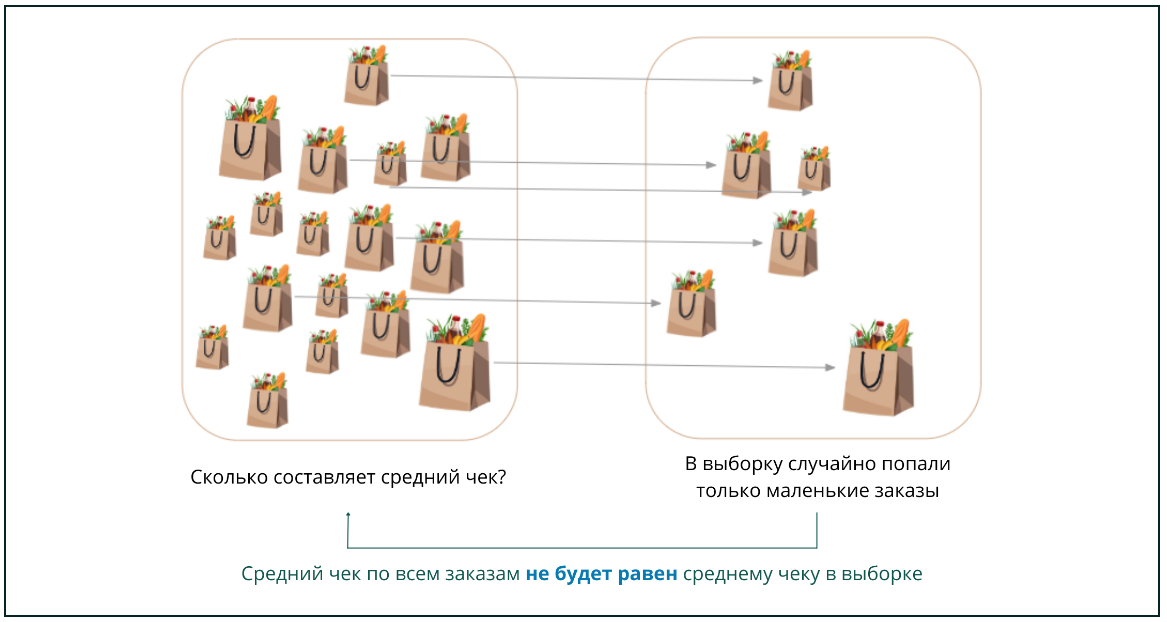

* Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
* Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

Резюмируем:

* Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.
* Статистические тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.
* Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.

## 3. Понятие статистической гипотезы

Итак, мы разобрались, в каких случаях необходимы статистические тесты. Настала пора знакомиться с ними, и мы начнём с важнейшего для статистических тестов понятия — статистической гипотезы.

Статистическая гипотеза — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.

Примечание. Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

### АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ

Общий алгоритм проверки гипотезы состоит из шести этапов:

1. Построение нулевой и альтернативной гипотез.
2. Выбор уровня значимости "альфа".
3. Сбор данных для проверки гипотезы.
4. Выбор статистического теста.
5. Проведение статистического теста, вычисление p-value.
6. Сравнение p-value c уровнем значимости "альфа" и вывод, отклонить или не отклонить нулевую гипотезу.

Далее мы подробно рассмотрим каждый из них.


### НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ

Проведение статистических тестов начинается с формулирования двух конкурирующих между собой статистических гипотез — нулевой и альтернативной.

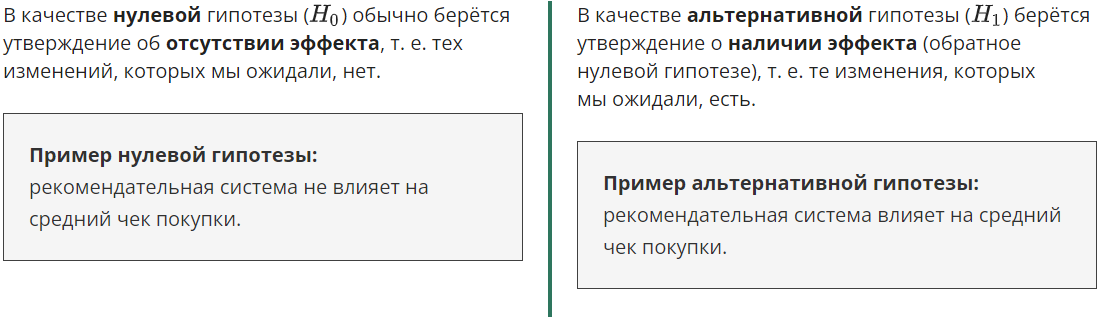

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

* отклоняем нулевую гипотезу в пользу альтернативной (делаем вывод, что эффект есть);
* не отклоняем нулевую гипотезу, так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).

Существует три варианта формулировки нулевой и альтернативной гипотез. Давайте рассмотрим формулировки вместе с их математической интерпретацией. Пусть "мю1" — средний чек покупки без просмотра рекомендаций,  "мю2"— средний чек покупки после просмотра рекомендаций.

Примечание. Ещё раз отметим, что "мю1" и "мю2" — средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), т. е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

Однако мы можем составить следующие бизнес-вопросы и соответствующие им гипотезы:

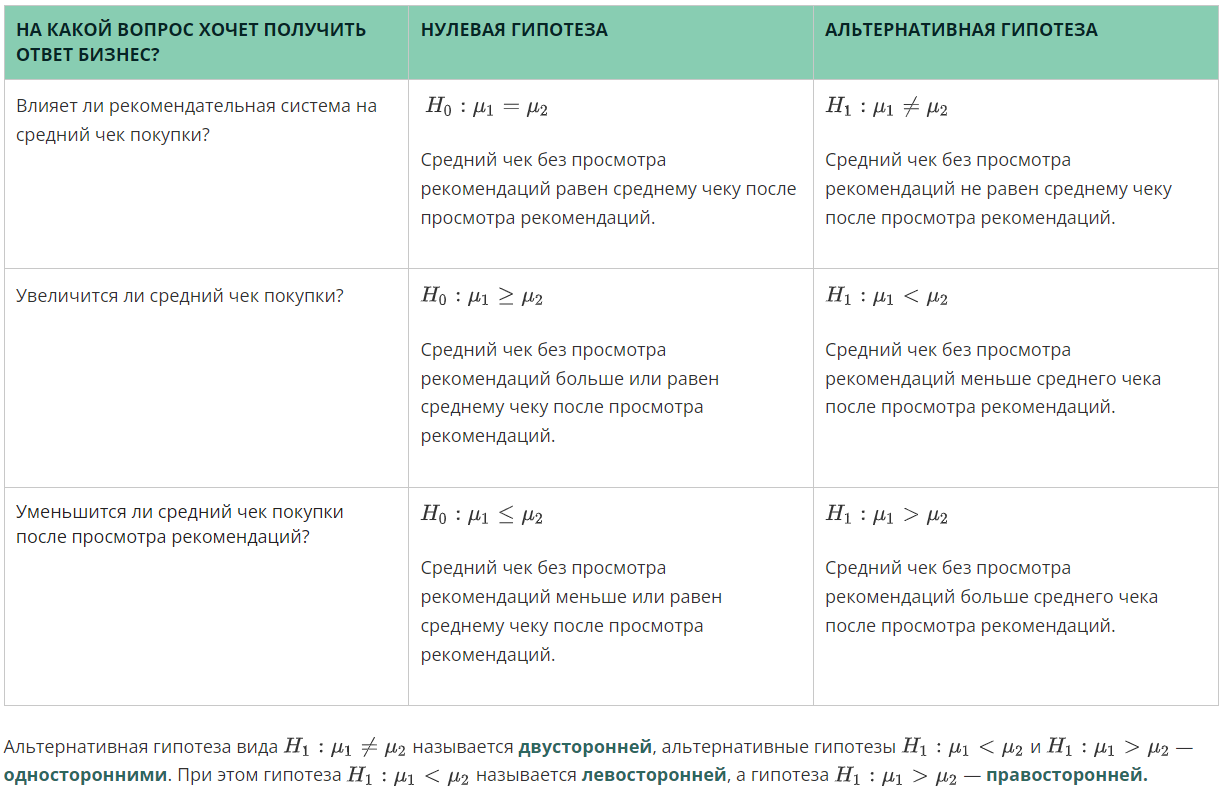

Рассмотрим тонкости формулировок гипотез более подробно.

1. В качестве первого примера возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций?».

Нулевая и альтернативная гипотезы будут следующими:

* 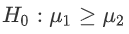 — после внедрения рекомендаций средний чек уменьшился или не изменился.
* 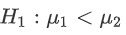— после внедрения рекомендаций средний чек увеличился.

Пусть мы сделали две выборки покупок (без и после просмотра рекомендаций) и получили следующие средние значения чека:

* без просмотра рекомендаций —  ;

* после просмотра рекомендаций —  .

Проверка этих гипотез позволит определить, существует (статистически значима) ли разница в размере чеков в 290 рублей на генеральных совокупностях. То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях  и .

Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. Мы знаем, что содержание натрия должно быть не более 300 мг на 100 г соуса, и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия (), должно быть меньше или равно 300 мг на 100 г.

Тогда нулевая и альтернативная гипотезы будут следующими:

* 
* 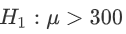


Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. Предположим, что среднее значение содержания натрия в выборке составило  мг на 100 г соуса.

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия () отличается от заявленного на упаковке. Возможно, что измеренное нами выборочное значение  является следствием погрешностей и случайностей.

Как видите, в приведённых выше примерах постановка задач и формулировка гипотез отличаются:

* В первом случае нам необходимо было сравнить два средних на двух генеральных совокупностях на основе данных из двух выборок.
* Во втором случае мы имели дело с одной выборкой и хотели проверить соответствие математического ожидания требуемому показателю.

Почему это важно? Далее мы увидим, что один из критериев выбора статистического теста, — это количество групп (выборок). Например, в первом случае мы будем выбирать среди двухвыборочных тестов, а во втором — среди одновыборочных.

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. Нулевая гипотеза — это утверждение об отсутствии эффекта, который мы хотим проверить, а альтернативная — утверждение о наличии такого эффекта.

Давайте закрепим полученные знания с помощью небольшого теста.

### 4. Статистическая значимость

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — насколько статистически значимы полученные нами результаты.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости (p-value).

### ОШИБКИ I И II РОДА

При проверке гипотезы возможно допустить ошибку одного из двух видов:

* Ошибка I (первого) рода: отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется "альфа"-ошибкой, или ложноположительным результатом.
* Ошибка II (второго) рода: неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется "бета"-ошибкой, или ложноотрицательным результатом.

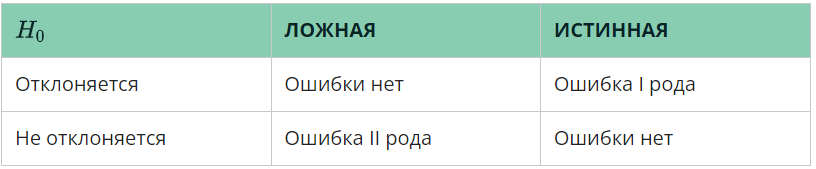

В примере про предварительную проверку рекомендательной системы на выборке покупателей ошибками первого и второго рода будут следующие ситуации:

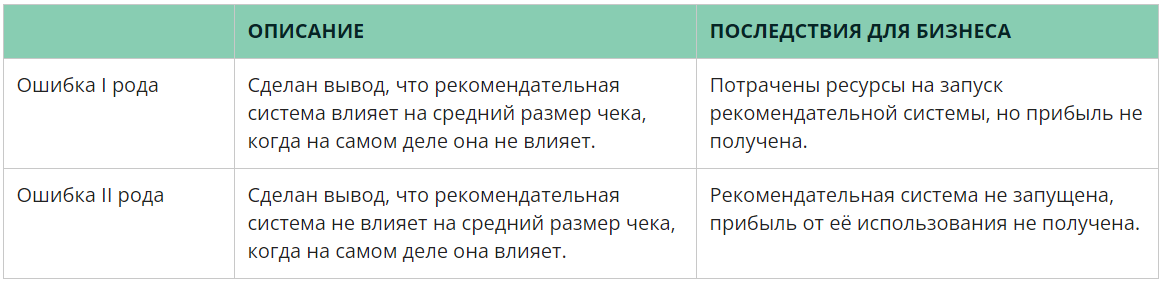

Как вы понимаете, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез.

Примечание. Вероятность не допустить ошибку II рода (1 - "бета") ещё называют мощностью теста. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).

Примечание. Ошибки первого и второго рода — предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

* Отнести образец к классу 1, когда он на самом деле относится к классу 0. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.
* Не отнести образец к классу 1, когда он на самом деле относится к классу 1. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.

Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. Подробнее об этом вы узнаете в модулях по машинному обучению.

### СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)

Мы разобрались, что может пойти не так при проверке гипотезы. Вернёмся к понятию статистической значимости.

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно график оценки плотности ядра (Kernel Density Estimation, KDE). Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

По оси x отложено значение случайной величины (например, размера чека), а по оси y — плотность вероятности (чем больше y, тем больше вероятность наблюдать значение по оси x). Детали построения графиков плотности вероятностей https://machinelearningmastery.ru/recipes-for-the-visualizations-of-data-distributions-a1527a0faf77/.

Примеры графиков плотности распределения вероятности (оранжевые) с соответствующими гистограммами:

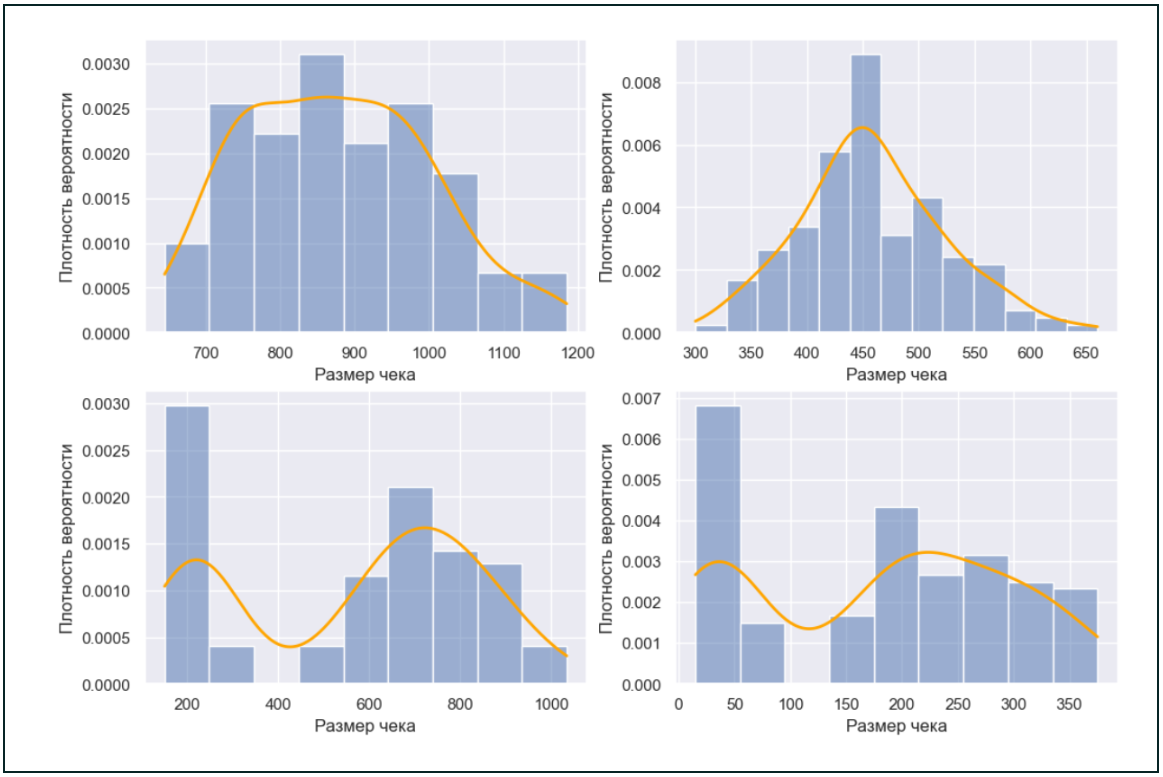

График плотности вероятности построен так, что вся площадь под кривой равна 1 — это вероятность всех возможных значений размера чека. Это следует из основного правила теории вероятностей: сумма вероятностей всех исходов (всех возможных значений чека) всегда равна 1.

Площадь под кривой на интервале от a до b (голубая область) соответствует вероятности получить среднее значение от a до b (на графике ниже такая вероятность ~ 0.3):

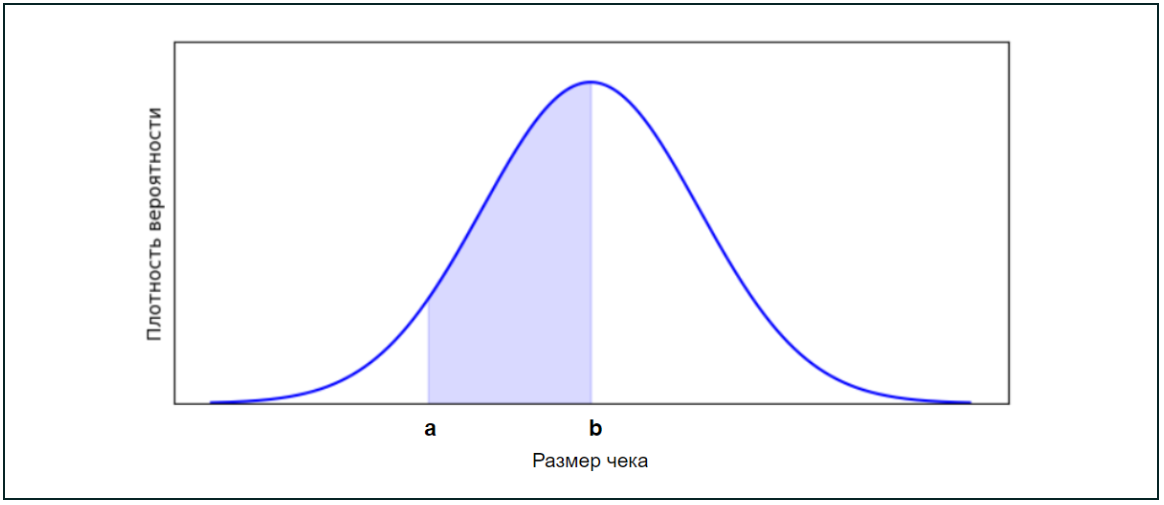

Например, если a = 350, а b = 500, это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне от 350 до 500 рублей составляет 0.3.

Теперь мы, наконец, готовы ввести понятие p-value.

Уровнем статистической значимости (p-value, p-значением) называется вероятность получить наблюдаемые или более экстремальные значения при условии, что нулевая гипотеза верна.

Рассмотрим это определение на примере ответа на вопрос «Средний чек покупки в онлайн-магазине больше 500 рублей?». Гипотезы будут следующими:

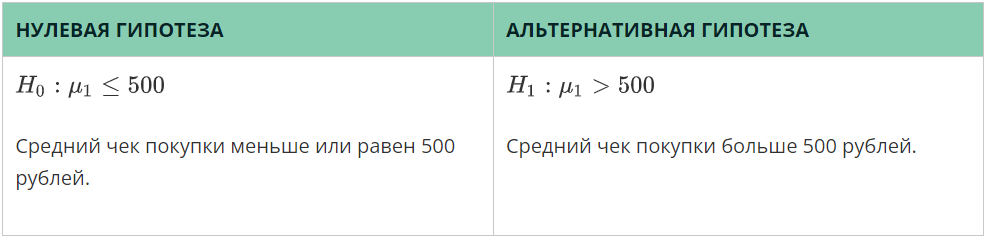

Сначала допустим, что верна нулевая гипотеза: средний чек покупки (на генеральной совокупности) меньше или равен 500 рублей.

Нам неизвестно, какой будет истинная форма плотности вероятности чека, которая получается на основе генеральной совокупности. Обычно предполагают какую-то форму из стандартных законов распределений, например, из нормального закона распределения, как на графике ниже (о нормальном распределении и его свойствах мы поговорим далее). Синяя пунктирная линия соответствует среднему чеку в 500 рублей, вокруг которого мы строим нулевую гипотезу:

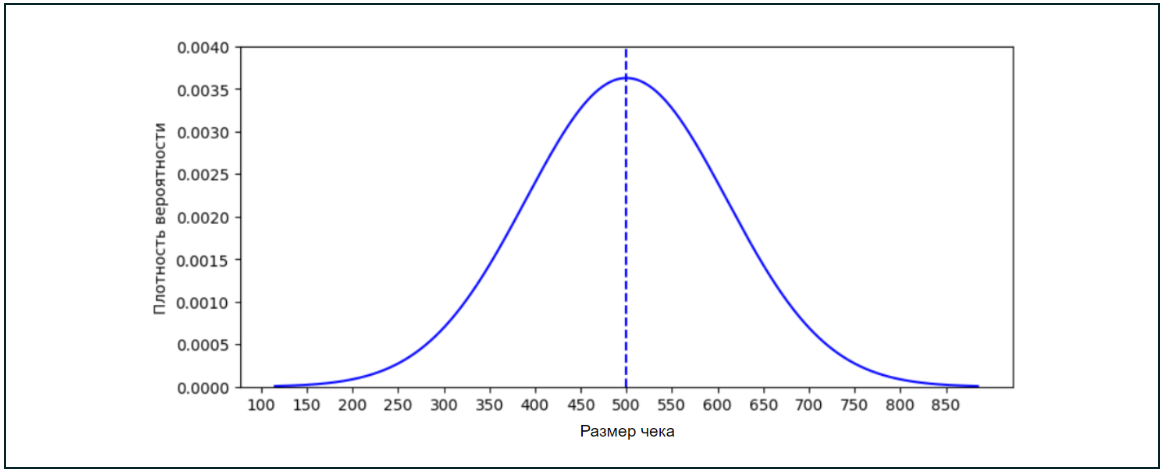

Пусть на выборке мы получили средний размер чека 700 рублей. Отметим это значение на графике:

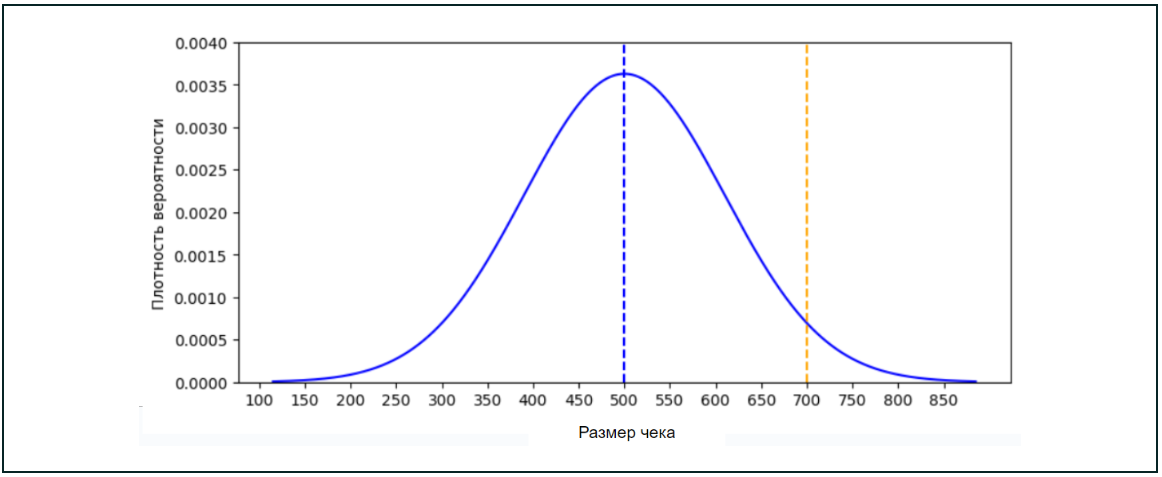

Какова вероятность получить такой же (700 рублей) или ещё больший средний чек при условии, что средний чек равен 500 рублям? Этой вероятностью будет площадь под кривой от 700 к большим значениям (p-value = p):

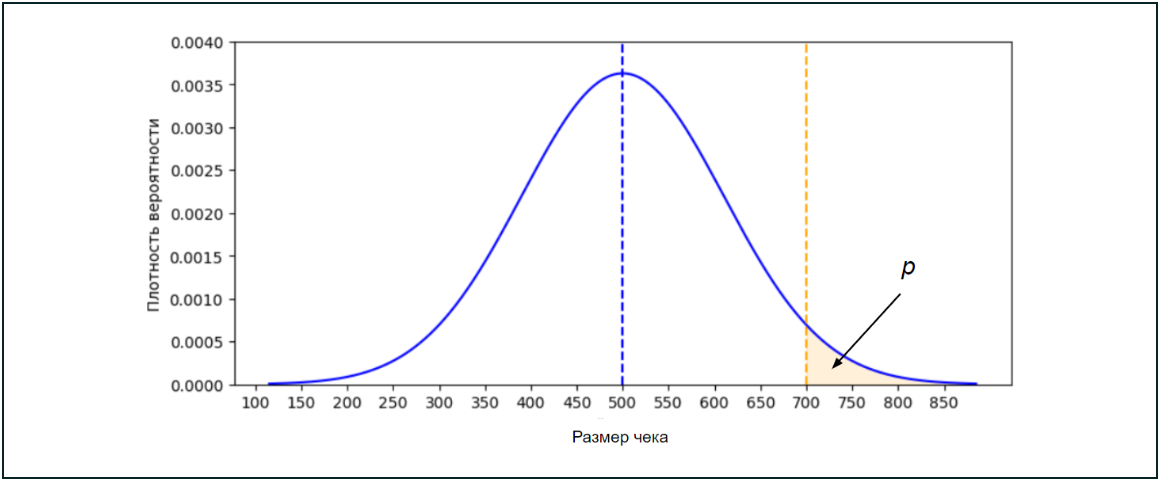

Чем больше было бы число, которое мы получили на выборке:

* тем меньше была бы площадь под кривой, т. е. меньше полученное значение p-value;
* тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека — 500 рублей или меньше.

Важно понимать, что p-value — это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.

Следующее необходимое нам понятие — уровень значимости.

Уровень значимости — это пороговая вероятность допустить ошибку I рода (вероятность отклонить нулевую гипотезу, когда она верна). Обычно это число обозначается за .

Если полученное значение p-value меньше заранее заданного уровня значимости , мы отвергаем нулевую гипотезу. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут  = 500. Это означает, что мы готовы к 5 % риску допустить ошибку I-ого рода (то есть сделать вывод, что эффект есть, хотя на самом деле его нет).

Итак:

Если полученное p-value ниже уровня значимости (), результаты статистически значимы и согласуются с альтернативной гипотезой.
Если полученное p-value выше уровня значимости (), результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу.
Примечание. Если p-value равно уровню значимости (), то возникает дилемма: принять нулевую гипотезу или отвергнуть её в зависимости от предварительных условий. На практике, если не оговорено других предварительных условий, в большинстве случаев нулевую гипотезу отвергают, если .

Иллюстрация принятия решения для проверки гипотезы:

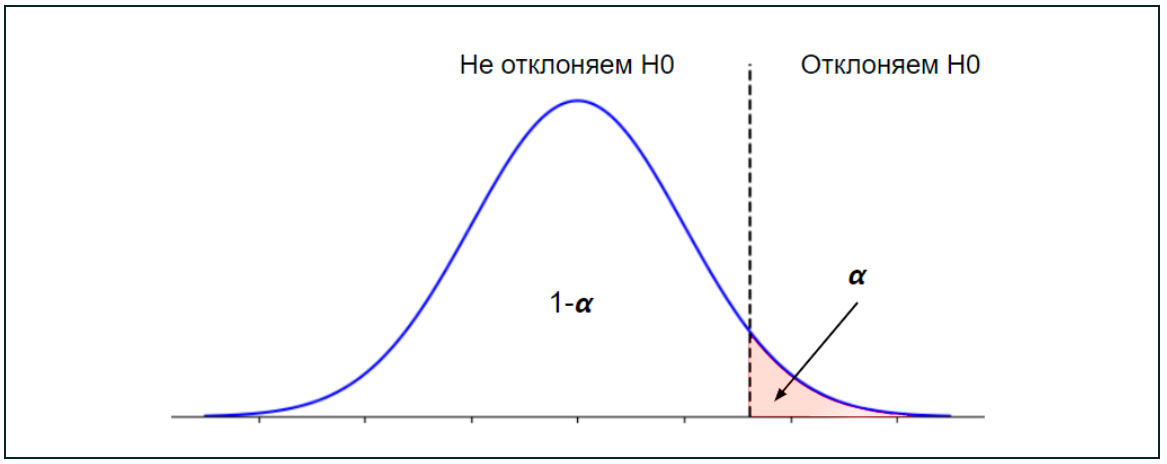

Примечание. Раньше специалисты по статистике вручную рассчитывали p-value по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. Теперь мы можем просто воспользоваться готовыми функциями из библиотек SciPy и Statsmodels для языка Python. Эти функции мы ещё разберём далее в модуле, а в этом юните опустим детали получения p-value.

В нашем примере p-value = 0.03 (пока мы опустили детали вычисления). Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на 200 и более рублей, составляет 0.03. Иллюстрация выглядит так:

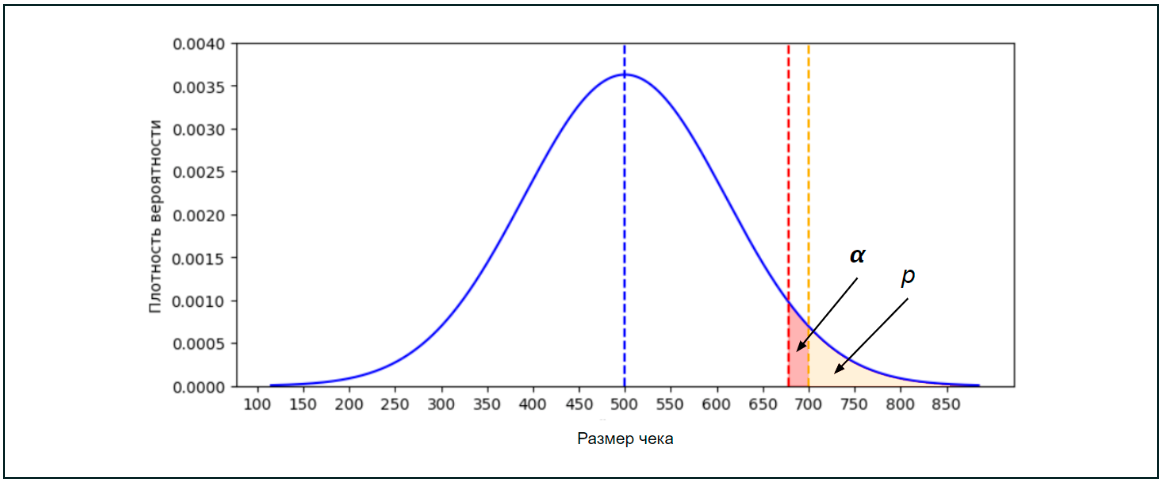

Площадь жёлтой области равняется p-value (0.03), площадь красной области равняется  (0.05). P-value меньше  — значит, мы можем отвергнуть нулевую гипотезу в пользу альтернативной и сказать, что средний чек покупки больше 500 рублей.

####  ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ

Выше мы приводили иллюстрацию принятия решения для проверки односторонней (правосторонней) гипотезы:

* одна область отклонения нулевой гипотезы (справа);
* площадь области = .

Аналогичная иллюстрация для левосторонней гипотезы:

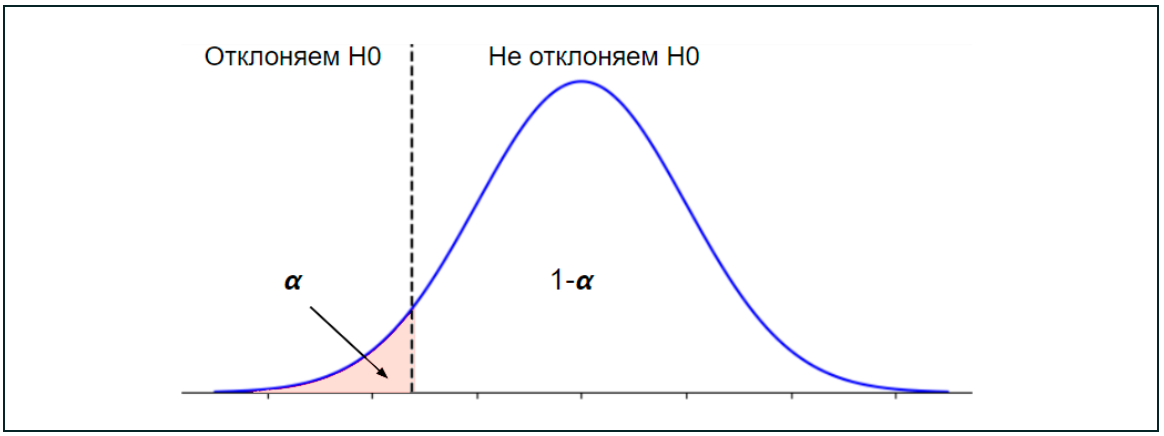

Для двусторонней гипотезы иллюстрация будет следующей:

* две области отклонения нулевой гипотезы (справа и слева);
* площадь каждой области =  / 2.

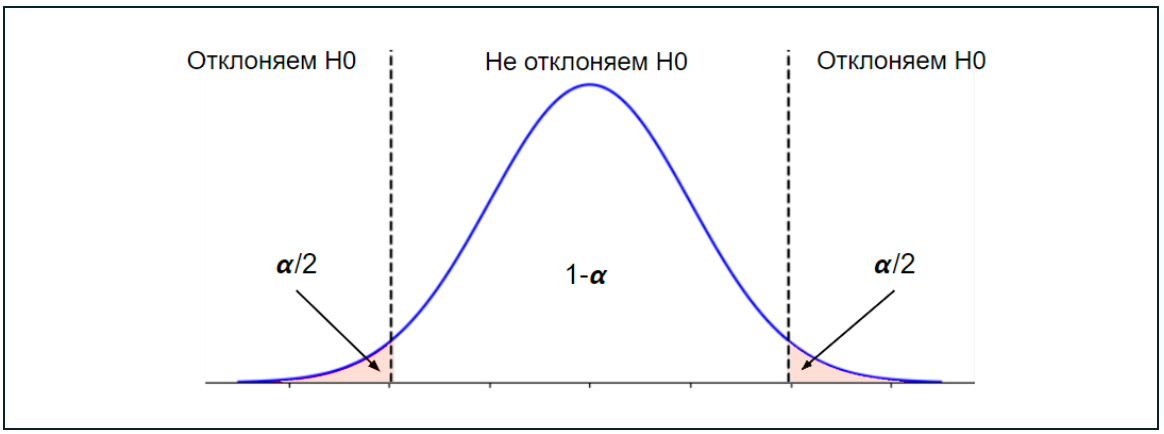

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны — и в большую, и в меньшую. В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах.

#### КАК ВЫБРАТЬ  ?

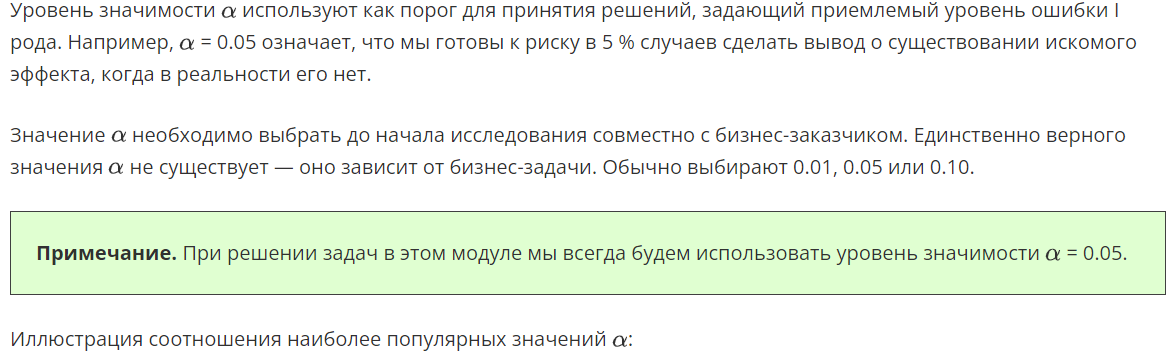
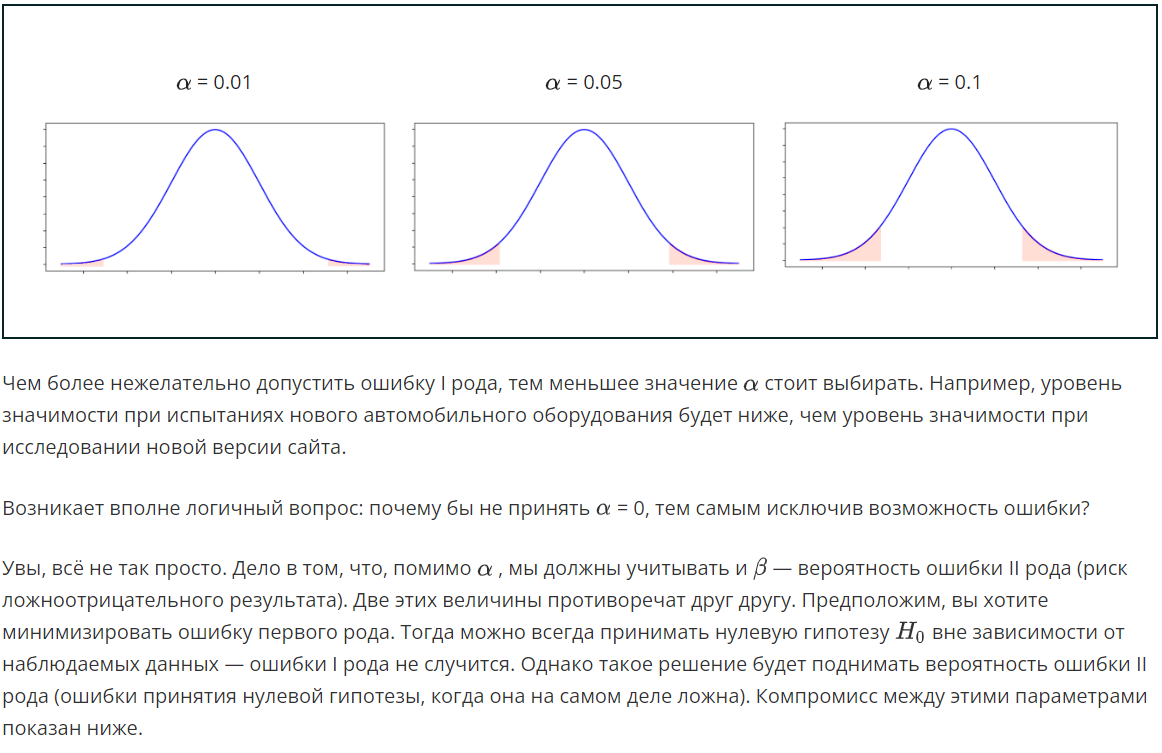
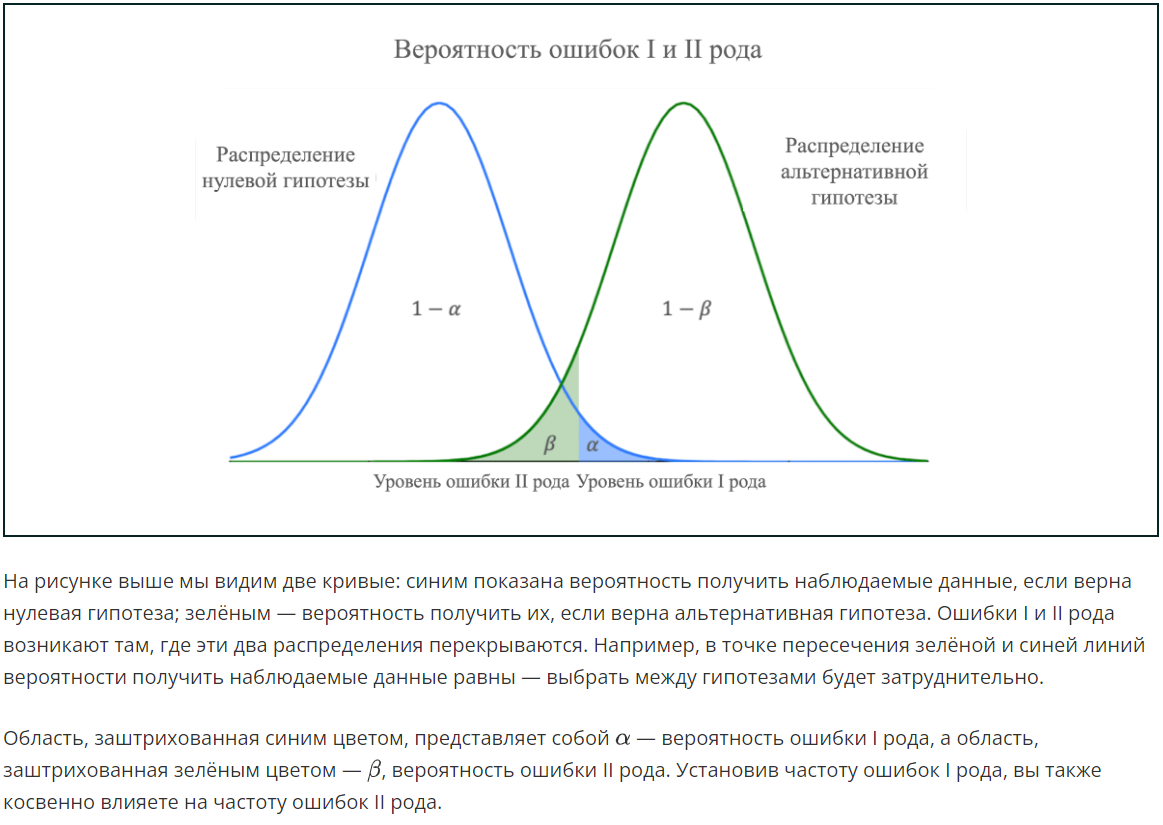
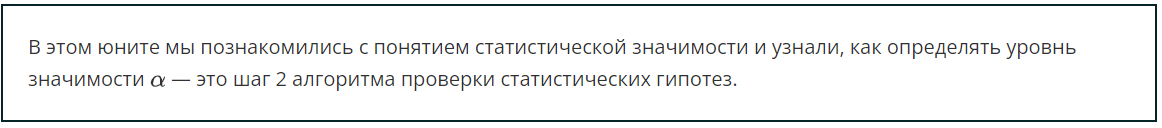

## 5. Статистические тесты: введение

Предыдущий юнит был посвящён выбору статистической значимости. В этом мы разберём выбор статистического теста — это шаг 4 в алгоритме проверки статистической гипотезы.

### ОСНОВНЫЕ ТИПЫ СТАТИСТИЧЕСКИХ ТЕСТОВ

Существует множество статистических тестов. Задача дата-сайентиста в том, чтобы выбрать подходящий тест и провести его, получив на выходе p-value. Далее мы разберём, от чего зависит выбор теста, а также их основные типы.

Вспомним, что признаки объектов, которые мы анализируем, делятся на количественные и категориальные.

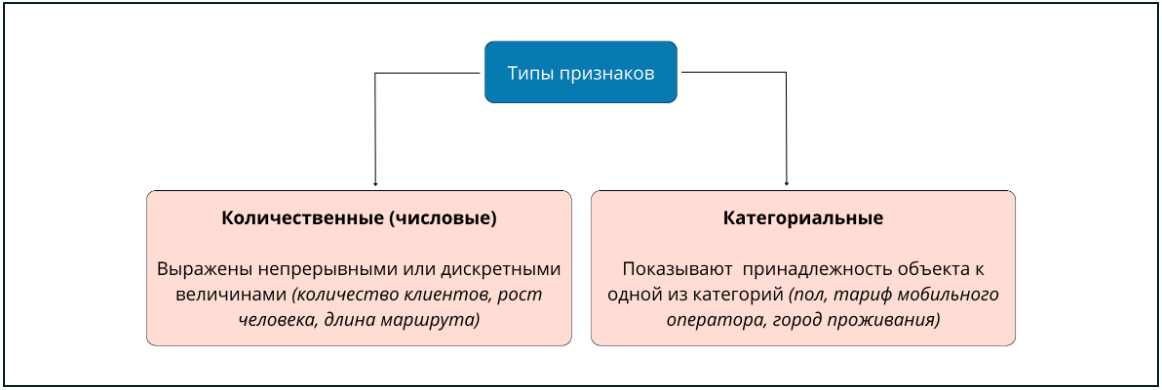

Для разных типов признаков используются разные статистические тесты.

Далее мы будем говорить о статистических тестах для количественных признаков, так как они состоят из большего числа этапов и задачи с количественными признаками чаще встречаются на практике. Тесты для категориальных признаков мы рассмотрим в юните «Статистические тесты для категориальных признаков».

Выбор статистического теста для количественных признаков зависит от ряда факторов:

* количества анализируемых групп (выборок): одна, две, три и более групп;
* зависимости групп: зависимые и независимые;
* знания о распределении признаков по нормальному закону.

Ниже мы рассмотрим каждый из этих факторов.

#### КРИТЕРИЙ ВЫБОРА ТЕСТА: КОЛИЧЕСТВО ГРУПП

По количеству анализируемых групп тесты делятся на одновыборочные, двухвыборочные и многовыборочные.

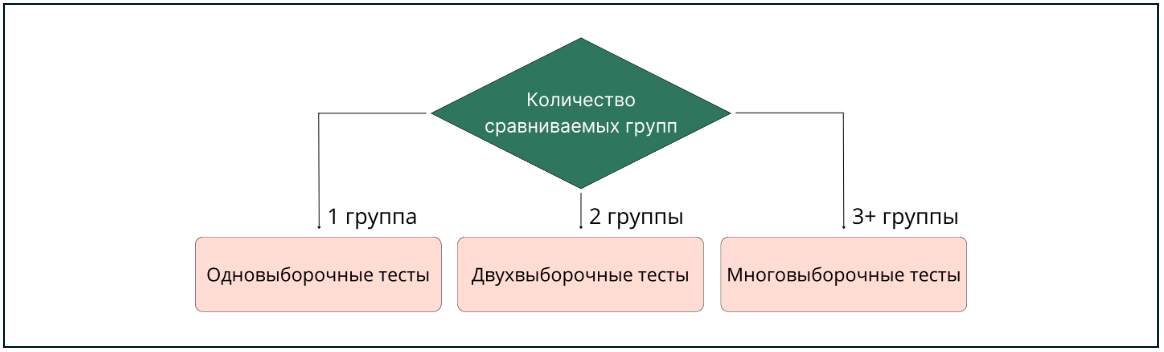

Количество групп определяется значением фактора, влияние которого мы анализируем, например:

* Чтобы определить, достигается ли целевой показатель «среднее время посещения сайта — пять минут», понадобится случайным образом набрать из посетителей этого сайта одну группу.
* Для определения эффекта от лекарства понадобится две группы: пациенты, не принимающие лекарство (контрольная группа), и пациенты, принимающие его (тестовая группа).
* Чтобы выяснить, влияет ли цвет машины на её стоимость, понадобится количество групп, равное анализируемому количеству цветов: белый, чёрный, красный, серый и т. д.

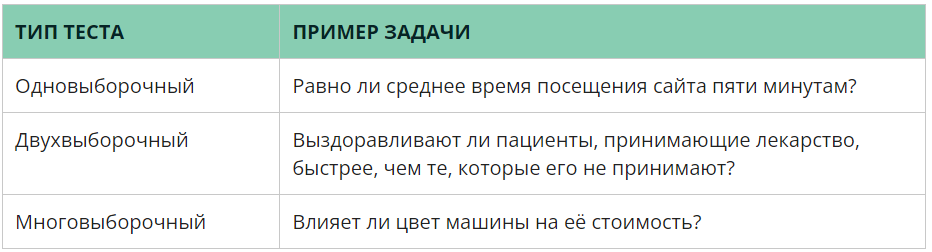

#### КРИТЕРИЙ ВЫБОРА ТЕСТА: ЗАВИСИМОСТЬ ГРУПП

Сравниваемые группы могут быть независимыми и зависимыми.

В независимых группах набор объектов в одну группу проходит независимо от набора объектов в другие группы.
Примеры: случайное деление школьников внутри одного класса, случайный набор в группы из всего множества пользователей приложения.

В зависимых группах каждый объект одной группы связан с объектом в другой группе. Такая ситуация возникает, например, когда мы анализируем признаки в динамике.
Примеры: покупатели до получения рассылки и эти же покупатели после её получения, пациенты до начала лечения и эти же пациенты после его окончания.

Тесты, разработанные для сравнения независимых групп, называются непарными, тесты для сравнения зависимых групп — парными.

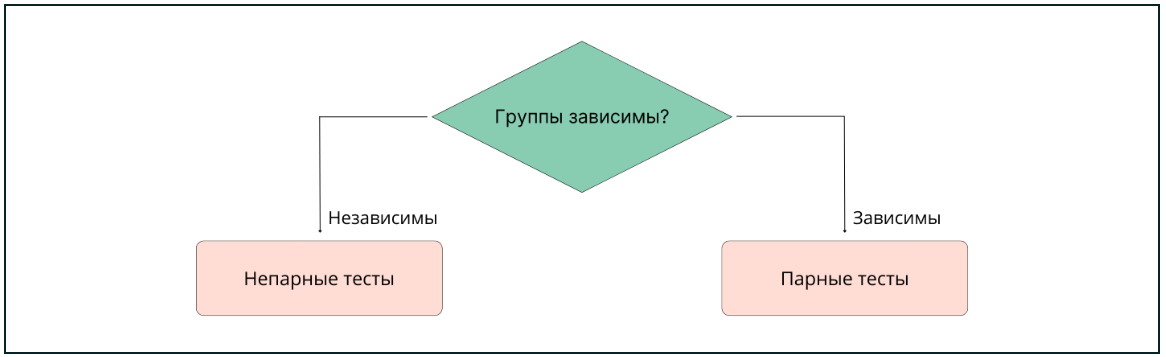

#### КРИТЕРИЙ ВЫБОРА ТЕСТА: РАСПРЕДЕЛЕНИЕ ПРИЗНАКА ПО НОРМАЛЬНОМУ ЗАКОНУ

Если признаки распределены по нормальному закону, к ним можно применять параметрические тесты — статистические методы, основанные на параметрах нормального распределения (среднее значение, стандартное отклонение).

Если мы знаем, что признаки не распределены нормально или у нас нет информации об их распределении, необходимо использовать непараметрические тесты. Их можно применять на любых количественных признаках независимо от вида их распределения. Непараметрические методы менее чувствительны к выбросам в данных.

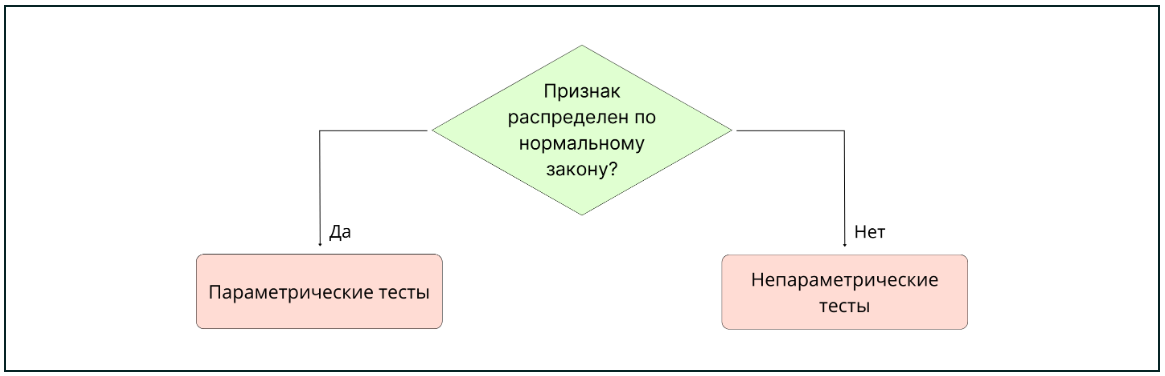

Непараметрические методы можно применять и на нормально распределённых данных, но в таком случае они будут менее мощными (будут обладать меньшей мощностью теста), чем параметрические.

### АЛГОРИТМ ВЫБОРА ТЕСТА ДЛЯ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ

Ранее мы рассмотрели факторы, влияющие на выбор статистического теста. Объединив эти факторы, мы получим следующий алгоритм выбора статистического теста для одного количественного признака (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

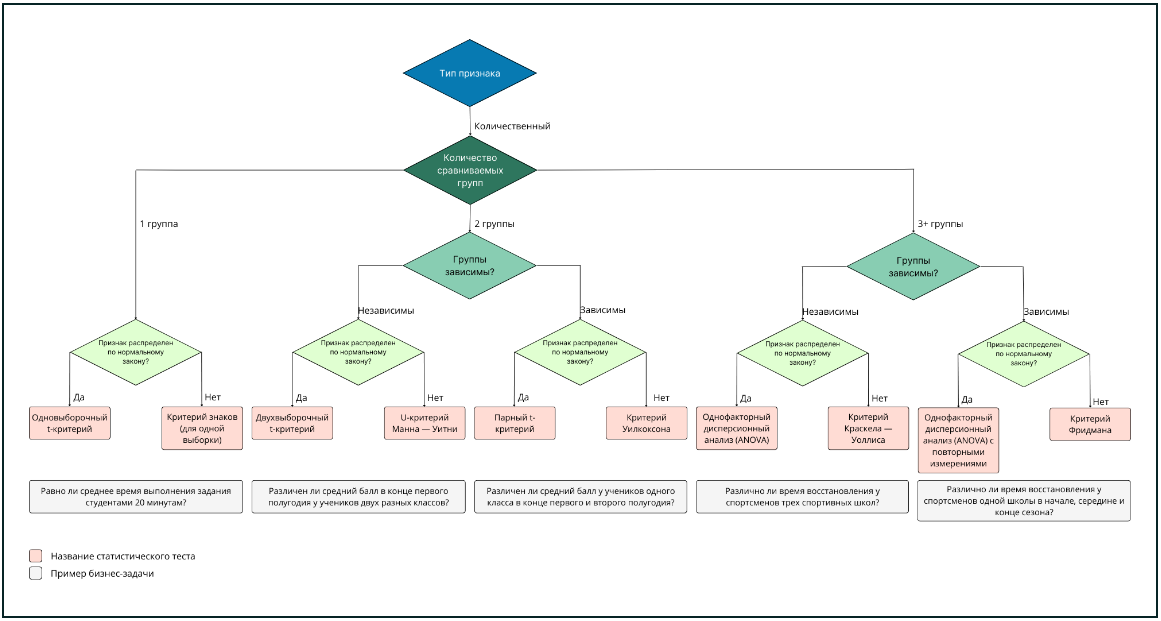

Например, в задаче, зависит ли средний чек покупки от пола покупателей, шаги по выбору теста будут такими:

* Какой тип у признака «средний чек»?
Количественный.
* Сколько сравниваемых групп?
Две (мужчины и женщины).
* Группы зависимы?
Нет, так как объекты в выборках не повторяются.
* Признак распределён по нормальному закону?
Если да, нужен двухвыборочный t-критерий.
Если нет, нужен U-критерий Манна — Уитни.

Примечание. Двухвыборочный t-критерий, U-критерий Манна — Уитни и другие приведённые в алгоритме статистические тесты мы рассмотрим в следующих юнитах.

В алгоритме указано по одному, наиболее популярному, тесту для каждой ситуации. На самом деле видов статистических тестов больше — они различаются предположениями о данных и принципом работы. Одну и ту же задачу можно решить с помощью нескольких видов тестов.

Примечание. Для сравнения групп одновременно по нескольким признакам используют методы двумерного и многофакторного анализа, например, регрессионный анализ, многофакторный дисперсионный анализ и др.

Пример бизнес-задачи: оценка влияния уровня образования (среднее профессиональное, высшее, научная степень) на зарплату и число полётов за границу в год.

### 6. Проверка на нормальность

В предыдущем юните мы говорили, что для выбора между параметрическими и непараметрическими тестами необходимо проверить распределение признаков на нормальность. Сейчас мы узнаем, что такое нормальное распределение, почему оно так важно для нас и как проверить, подчиняется ли распределение данных нормальному закону.

Начиная с этого раздела, мы будем практиковаться на Python. Для этого нам понадобятся две новых библиотеки:

* SciPy https://docs.scipy.org/doc/scipy/index.html — библиотека для научных и инженерных расчётов.
* Statsmodels https://docs.scipy.org/doc/scipy/index.html — библиотека для статистических исследований.

Установить эти библиотеки можно с помощью стандартной команды:

In [1]:
# pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Многие процессы в природе следуют нормальному закону распределения: рост человека, вес при рождении, артериальное давление, размер ноги и др.

На курсе вы уже сталкивались с понятием нормального распределения и некоторыми теоремами и правилами, основанными на особенностях нормального распределения. В частности в модуле «Очистка данных» мы изучали метод z-отклонений (трёх сигм) и метод Тьюки для поиска выбросов — они работают только для нормально распределённых данных.

Нормальное распределение (распределение Гаусса) характеризуется двумя числами:

* средним значением  (mu);
* стандартным отклонением  (sigma).
Примеры нормальных распределений с разными  и :

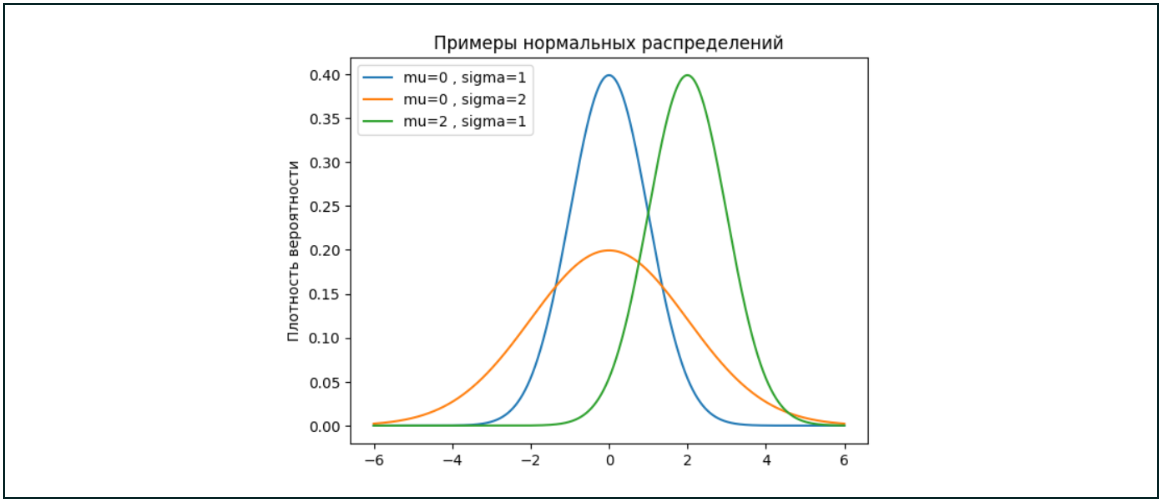

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

* Один пик в центре и симметричные боковые стороны (одномодальное распределение).
* Среднее и медиана равны и расположены в центре распределения.
* Отклонение значений от среднего подчиняется правилу трёх сигм:  
** 68 % значений находятся в пределах одного стандартного отклонения от среднего;  
** 95 % значений — в пределах двух стандартных отклонений;  
** 99.7% значений — в пределах трёх стандартных отклонений.  

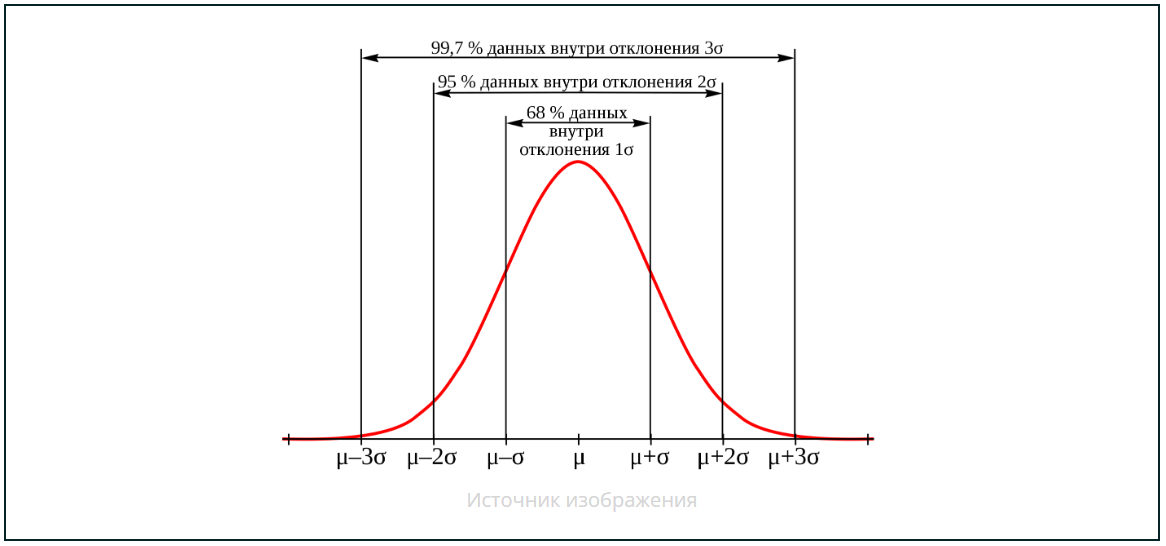

### ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

ГИСТОГРАММА

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

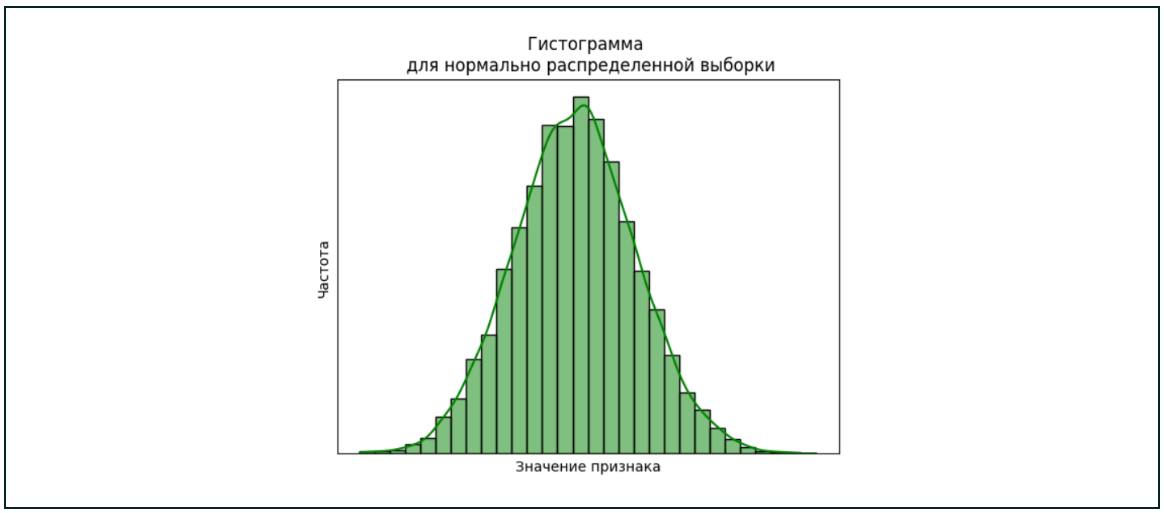

Напомним, что в Python гистограмму можно построить с помощью функции histplot() пакета seaborn. Параметр kde=True добавляет к гистограмме график оценки плотности ядра.

Рассмотрим эту функцию на примере датасета California Housing https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing, входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

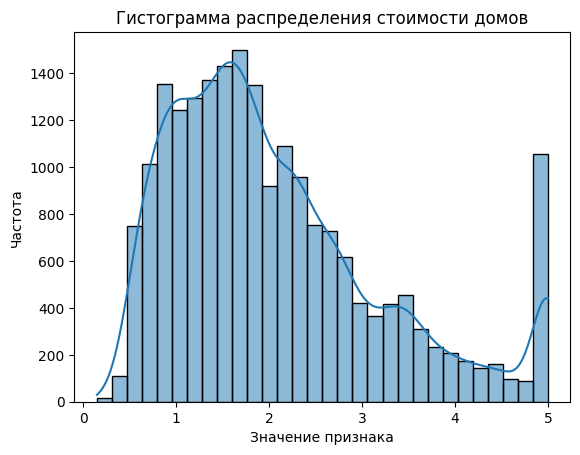

In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по Q-Q Plots https://habr.com/ru/articles/578754/.

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

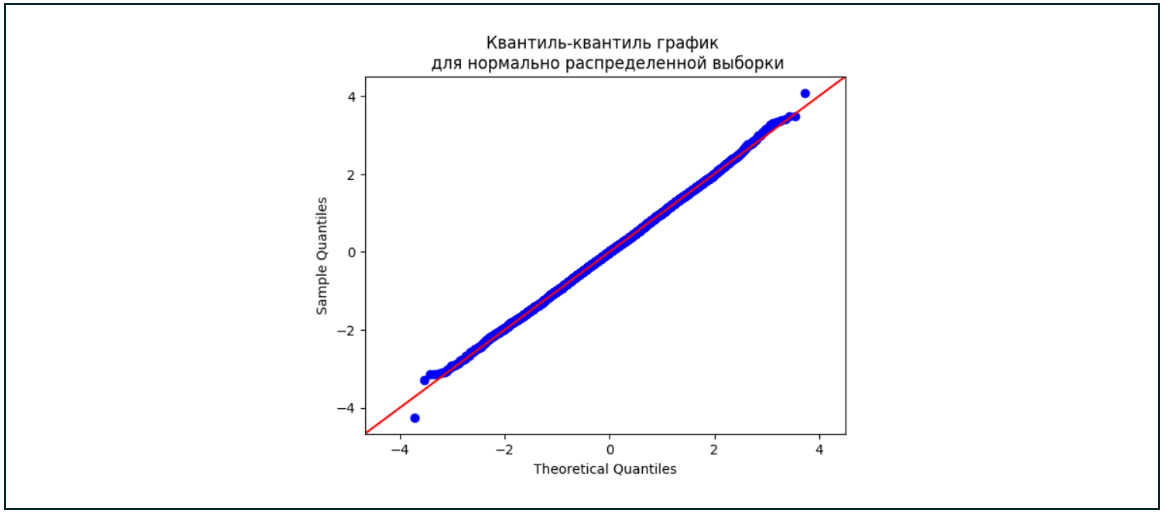

В Python квантиль-квантиль график можно построить с помощью функции qqplot() https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

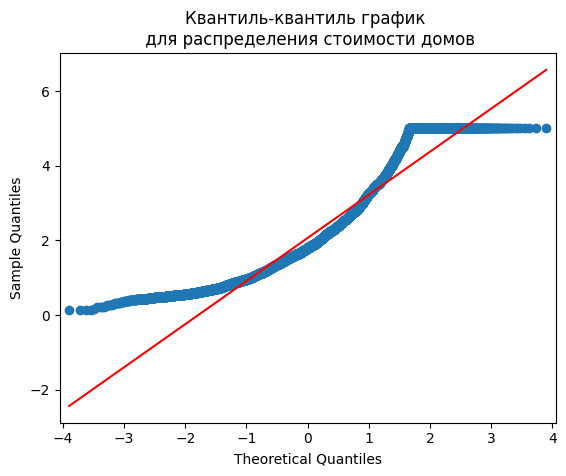

In [2]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

### СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод — тест Шапиро — Уилка.

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

* Нулевая: данные распределены нормально.
* Альтернативная: данные не распределены нормально.

Детали расчёта p-value в тесте Шапиро — Уилка http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0.

Если p-value теста больше уровня значимости , то мы считаем, что данные распределены нормально.

ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python тест Шапиро — Уилка реализован в функции shapiro() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Мы рассмотрели графические и статистические методы проверки на нормальность. Их можно использовать как вместе, так и по отдельности.

Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, тест Д’Агостино https://lms-cdn.skillfactory.ru/assets/courseware/v1/0fcd5152bed6325a2812c9e295847038/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/guid_normal_tets.pdf или тест Колмогорова — Смирнова http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0. У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. Ещё больше способов проверки на нормальность.

Ранее мы говорили, что для нормально распределённых данных можно использовать параметрические тесты. Теперь мы умеем проверять, является ли распределение нормальным, а значит, настало время обсудить параметрические тесты. Но прежде давайте закрепим полученные знания небольшим тестом.

### Задание 6.2

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10

С помощью теста Шапиро — Уилка определите, распределены ли значения нормально. Введите полученное p-значение, округлённое до двух знаков после точки-разделителя.

In [5]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.2f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.41
Распределение нормальное


## 7. Параметрические тесты

В предыдущем юните мы рассмотрели методы проверки на нормальность. Она необходима, чтобы выбрать, какие статистические тесты использовать:

* параметрические, если распределение признака нормальное;
* или непараметрические, если распределение признака отлично от нормального или о нём нет информации.

В этом юните мы:

* разберём параметрические тесты, которые упомянули в алгоритме выбора статистического теста для количественных признаков;
* для каждого теста приведём описание функции, которая реализует его в Python-библиотеках, и пример использования на Python.

Примечание. При проведении тестов в этом модуле мы не будем вдаваться в детали расчётов — все они реализованы в библиотеках Python и не выполняются вручную. Задача специалиста по Data Science — понимать область применения каждого из тестов и уметь интерпретировать их результаты. Детали расчётов можно посмотреть в следующих источниках:

* С. Гланц. Медико-биологическая статистика https://lms-cdn.skillfactory.ru/assets/courseware/v1/847415e20d047d021d9d7df064cb940f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/glantz_mbs.pdf.
* М. Б. Лагутин. Наглядная математическая статистика https://lms-cdn.skillfactory.ru/assets/courseware/v1/d8530f267817a83a8d11c84e90c606fe/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/lagutin_naglyadnaya_matematicheskaya_statistika.pdf.

Все функции, которые реализуют параметрические тесты в библиотеках Python:

на вход принимают:
* выборки или их параметры;
* параметры проверяемой гипотезы;

на выход отдают:
* уровень значимости p (p-value);
* дополнительные параметры (в большинстве случаев они нам не нужны).

Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

### ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html в модуле stats библиотеки scipy.

Основные входные параметры:

* a — выборочные данные;
* popmean — ожидаемое среднее значение признака;
* alternative — вид альтернативной гипотезы:  
** ‘two-sided’ (двусторонняя, используется по умолчанию);  
** ‘less’ (левосторонняя);  
** ‘greater’ (правосторонняя).  

Примеры задач, когда может понадобиться использование теста:

* Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
* Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батареи (мю) меньше или равно 40 часам.  
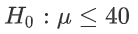  
* Альтернативная гипотеза: среднее время работы батареи (мю) больше чем 40 часов.  
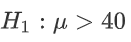

Решение на Python:

In [1]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

### ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

Основные входные параметры:

* a, b — выборочные данные двух групп;
* alternative — вид альтернативной гипотезы:
* ‘two-sided’ (двусторонняя, используется по умолчанию);
* ‘less’ (левосторонняя);
* ‘greater’ (правосторонняя);
* equal_var — равны ли дисперсии в группах (по умолчанию равны).

Ограничения применения теста:

* Группы должны быть независимыми.
* Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра equal_var.

Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях levene() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html и bartlett() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html модуля stats библиотеки scipy:

* Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
* На вход функции получают выборочные данные.
* На выход функции отдают p-значение.

Более подробная информация об этих тестах: тест Бартлетта http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D0%B0, тест Левена https://ami.nstu.ru/~headrd/Tests_of_Mean_and_Cov.htm.

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

* Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
* Есть две выборки студентов из двух университетов. Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

* Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.
* Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Планета» (мю1) меньше или равно среднему времени работы батарей «Заряд» (мю2).  
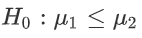  
* Альтернативная гипотеза: среднее время работы батарей «Планета» (мю1) больше среднего времени работы батарей «Заряд» (мю2).  
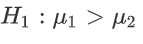

Решение на Python:

In [2]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах stats.ttest_ind важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» (мю2) меньше среднего времени работы батарей «Планета» (мю1):

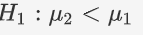

, то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):

_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)  

При этом значение p-value не изменяется. Вывод получается таким же.

### ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html библиотеки scipy.

Основные входные параметры:

* sample1, sample2, … — выборочные данные групп.

Ограничения применения теста:

* Группы должны быть независимыми.
* Тест можно выполнять на группах с равной дисперсией.

Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

* Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
* Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

* Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
* Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
* Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Заряд» (мю1), «Планета» (мю2) и «Энергия» (мю3) одинаковое.  
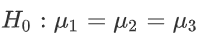
* Альтернативная гипотеза: среднее время работы батарей «Заряд» (мю1), «Планета» (мю2) и «Энергия» (мю3) не одинаковое.  
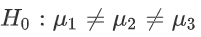

Решение на Python:

In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

### ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html в модуле stats библиотеки scipy.

Основные входные параметры:

* a, b — выборочные данные двух зависимых групп;
* alternative — вид альтернативной гипотезы:
* ‘two-sided’ (двусторонняя, используется по умолчанию);
* ‘less’ (левосторонняя);
* ‘greater’ (правосторонняя).

Ограничения применения теста:

* Тест можно применять, только если данные в обеих выборках распределены нормально.
* Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

* Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
* Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

* Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
* Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Планета» (мю1) меньше или равно среднему времени работы батарей «Заряд» (мю2).
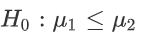
* Альтернативная гипотеза: среднее время работы батарей «Планета» (мю1) больше среднего времени работы батарей «Заряд» (мю2).
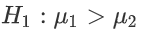

Решение на Python:

In [5]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: батареи «Планета» работают дальше, чем батареи «Заряд».

### ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html в модуле stats библиотеки statsmodels.

Основные входные параметры:

* data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
* within — название колонки с id группы;
* subject — название колонки с id объекта;
* depvar — название колонки со значением признака.

Ограничения применения теста:

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

* Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
* Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

* Батареи «Заряд»: 36, 45, 41, 41, 35.
* Батареи «Планета»: 32, 34, 42, 48, 43.
* Батареи «Энергия»: 41, 39, 35, 34, 52.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Заряд» (мю1), «Планета» (мю2) и «Энергия» (мю3) одинаковое.
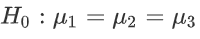
* Альтернативная гипотеза: среднее время работы батарей «Заряд» (мю1), «Планета» (мю2) и «Энергия» (мю3) не одинаковое.
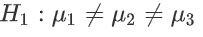

Решение на Python:

In [6]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

#              Anova
# ==================================
#       F Value Num DF Den DF Pr > F
# ----------------------------------
# group  0.0100 2.0000 8.0000 0.9900
# ==================================

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

Добавим все рассмотренные функции в наш алгоритм выбора теста (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

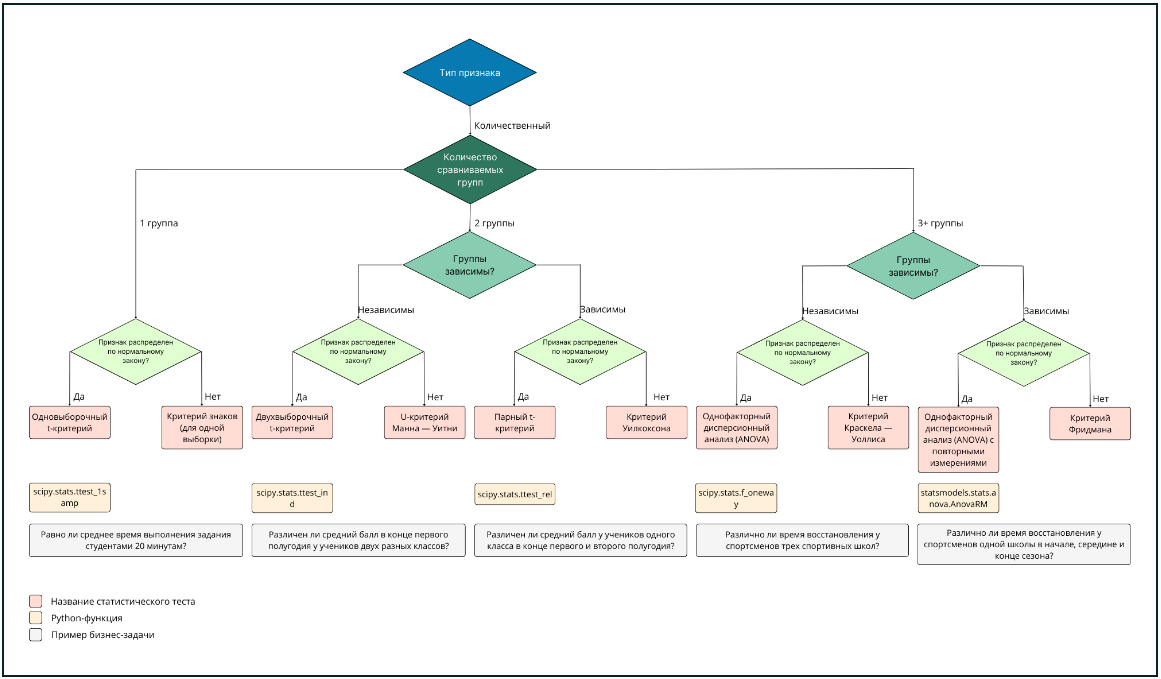

Итак, мы изучили наиболее популярные параметрические тесты и рассмотрели пример на Python для каждого из них. Далее нам предстоит разобраться с непараметрическими тестами.

### Задание 7.3

Компания оптимизировала доставку товаров и хочет узнать, сократилось ли среднее время доставки до 40 минут. Измерили время 20 случайных доставок — оно приведено в минутах и содержится в списке data:

data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Данные распределены нормально.

Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [9]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Задание 7.4

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. Измерили время 25 случайных доставок в каждом из районов — оно составило в минутах:

Северный:

* data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Южный:

* data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]

Восточный:

* data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

Данные распределены нормально.

Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [10]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]
group_energiya = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.000
Дисперсии не одинаковы, нужно использовать непараметрический тест

Тест на равенство средних
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Задание 7.5

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. Для 30 курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:

до:

* data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

после:

* data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

Проведите статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

In [11]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_planeta = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='less')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
